In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

## Step 3: Customer Segmentation/Clustering

In [4]:
# Prepare Data for Clustering
# 1. Calculate customer-level features (e.g., total quantity and total value)
customer_features = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum', 
    'TotalValue': 'sum' 
}).reset_index()

In [5]:
# 2. Standardize features for better clustering performance
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])

In [6]:
# 3. Perform K-Means Clustering
# Initialize KMeans with specified number of clusters and random_state 
# Set n_init='auto' to avoid the FutureWarning
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto') 

# Fit the KMeans model to the normalized data
clusters = kmeans.fit_predict(normalized_features)

# Add cluster labels to the customer features DataFrame
customer_features['Cluster'] = clusters

C:\Users\Xiaomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# 4. Dimensionality Reduction using PCA
# Create a PCA object to reduce dimensionality to 2 components
pca = PCA(n_components=2) 

# Fit PCA to the normalized features and transform the data
pca_features = pca.fit_transform(normalized_features)

# Add PCA components to the DataFrame
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

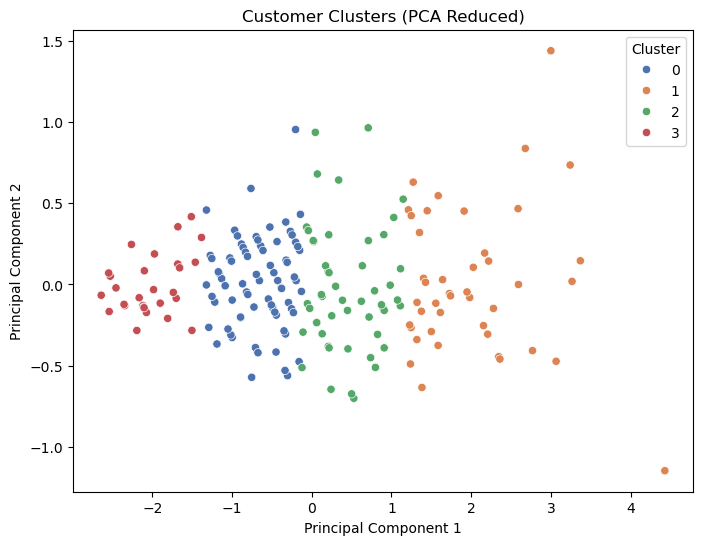

In [8]:
# 5. Visualize Clusters
# Create a scatter plot of customer clusters in the PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2', hue='Cluster', palette='deep')
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Observations from the Plot:
Potential Interpretations (based on general assumptions):

Cluster 1 (High TotalValue, High Quantity):  
This cluster likely represents high-value customers who make frequent purchases and spend significant amounts. They are valuable customers and should be targeted with loyalty programs, exclusive offers, and personalized recommendations.

Cluster 2 (High TotalValue, Low Quantity):  
This cluster could represent high-spending customers who make fewer but larger purchases. They might be interested in premium products or services and could be targeted with exclusive promotions and personalized concierge services.

Cluster 3 (Low TotalValue, High Quantity):  
This cluster could represent frequent buyers who make smaller purchases more often. They could be targeted with promotions on frequently purchased items, bundle offers, and loyalty programs that reward frequent purchases.

Cluster 4 (Low TotalValue, Low Quantity):  
This cluster likely represents occasional customers who make infrequent and small purchases. They might require additional engagement strategies to increase their purchase frequency and spending.